In [30]:
import numpy as np
import pandas as pd

In [31]:
books = pd.read_csv('prepared_data_book.csv')
comments = pd.read_csv('comments_cleaned_20250903_233541.csv')

# Remove avg_rating column from books to avoid merge conflicts
if 'avg_rating' in books.columns:
    books = books.drop(columns=['avg_rating'])

print("Books columns:", books.columns.tolist())

Books columns: ['Unnamed: 0', 'product_id', 'title', 'authors', 'original_price', 'current_price', 'quantity', 'category', 'n_review', 'pages', 'manufacturer', 'cover_link', 'discount']


In [32]:
books['cover_link'][1]

'https://salt.tikicdn.com/ts/product/d7/99/24/17bff8d26027846b2d7478ad4ba83fea.jpg'

In [33]:
comments.head()

product_id  comment_id            title  thank_count  customer_id  rating  \
0    74021317    12559756  C·ª±c k√¨ h√†i l√≤ng          313     22051463       5   
1    74021317    16979365  C·ª±c k√¨ h√†i l√≤ng            6     27791831       5   
2    74021317    14069617  C·ª±c k√¨ h√†i l√≤ng           25     17748750       5   
3    74021317     8569824  C·ª±c k√¨ h√†i l√≤ng           57       410797       5   
4    74021317    18368714  C·ª±c k√¨ h√†i l√≤ng            0     28545286       5   

                                             content  
0  C√≥ nh·ªØng ng∆∞·ªùi b∆∞·ªõc ƒë·∫øn, h·ªç l·∫•p ƒë·∫ßy h·∫°nh ph√∫c ...  
1  Th·∫•y nhi·ªÅu b·∫°n ch√™ tiki g√≥i h√†ng qu√°, may sao ...  
2  B√¨a c·ª±c xinh, tiki giao h√†ng nhanh, s√°ch kh√¥ng...  
3  S√°ch l√∫c nh·∫≠n h√¨nh th·ª©c r·∫•t ·ªïn, kh√¥ng cong v√™n...  
4  M·ªôt cu·ªën s√°ch r·∫•t ƒë√°ng ƒë·ªçc v·ªÅ t√¨nh y√™u th∆∞∆°ng ...

In [5]:
print(books.shape)
print(comments.shape)

(1767, 13)
(107524, 7)


In [6]:
books.isnull().sum()

Unnamed: 0        0
product_id        0
title             0
authors           0
original_price    0
current_price     0
quantity          0
category          0
n_review          0
pages             0
manufacturer      0
cover_link        0
discount          0
dtype: int64

In [7]:
comments.isnull().sum()

product_id         0
comment_id         0
title              3
thank_count        0
customer_id        0
rating             0
content        30988
dtype: int64

## Popularity Based Recommender System

In [34]:
ratings_with_name = (
    comments.drop(columns=['title'])
            .merge(books, on='product_id')
            .rename(columns={'title': 'book_title'})
)
ratings_with_name


product_id  comment_id  thank_count  customer_id  rating  \
0         74021317    12559756          313     22051463       5   
1         74021317    16979365            6     27791831       5   
2         74021317    14069617           25     17748750       5   
3         74021317     8569824           57       410797       5   
4         74021317    18368714            0     28545286       5   
...            ...         ...          ...          ...     ...   
107519    58971672    16391630            0      6625296       5   
107520    58971672    12767000            0     16435374       5   
107521    58971672    16322348            0     10549708       5   
107522    58971672    16288080            0     14487833       5   
107523    58971672    16204880            0     27440114       5   

                                                  content  Unnamed: 0  \
0       C√≥ nh·ªØng ng∆∞·ªùi b∆∞·ªõc ƒë·∫øn, h·ªç l·∫•p ƒë·∫ßy h·∫°nh ph√∫c ...           0   
1       Th·∫•y nhi·ªÅu b·∫°n ch√™ tiki g√≥i h√†ng qu√°, may sao ...           0   
2       B√¨a c·ª±c xinh, tiki giao h√†ng nhanh, s√°ch kh√¥ng...           0   
3       S√°ch l√∫c nh·∫≠n h√¨nh th·ª©c r·∫•t ·ªïn, kh√¥ng cong v√™n...           0   
4       M·ªôt cu·ªën s√°ch r·∫•t ƒë√°ng ƒë·ªçc v·ªÅ t√¨nh y√™u th∆∞∆°ng ...           0   
...                                                   ...         ...   
107519                                                NaN        1795   
107520                                      Tuy·ªát v·ªùi l·∫Øm        1795   
107521                                                NaN        1795   
107522                                                NaN        1795   
107523                                                NaN        1795   

                                               book_title  \
0                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
1                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
2                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
3                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
4                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
...                                                   ...   
107519  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107520  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107521  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107522  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107523  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   

                          authors  original_price  current_price  quantity  \
0       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
1       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
2       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
3       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
4       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
...                           ...             ...            ...       ...   
107519              Jack Canfield            5.82           3.84       954   
107520              Jack Canfield            5.82           3.84       954   
107521              Jack Canfield            5.82           3.84       954   
107522              Jack Canfield            5.82           3.84       954   
107523              Jack Canfield            5.82           3.84       954   

                        category  n_review  pages  \
0                    Ti·ªÉu Thuy·∫øt     11481    244   
1                    Ti·ªÉu Thuy·∫øt     11481    244   
2                    Ti·ªÉu Thuy·∫øt     11481    244   
3                    Ti·ªÉu Thuy·∫øt     11481    244   
4                    Ti·ªÉu Thuy·∫øt     11481    244   
...                          ...       ...    ...   
107519  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp       176    256   
107520  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp   

In [35]:
ratings_with_name = ratings_with_name.drop(columns=['Unnamed: 0'])



In [36]:
ratings_with_name

product_id  comment_id  thank_count  customer_id  rating  \
0         74021317    12559756          313     22051463       5   
1         74021317    16979365            6     27791831       5   
2         74021317    14069617           25     17748750       5   
3         74021317     8569824           57       410797       5   
4         74021317    18368714            0     28545286       5   
...            ...         ...          ...          ...     ...   
107519    58971672    16391630            0      6625296       5   
107520    58971672    12767000            0     16435374       5   
107521    58971672    16322348            0     10549708       5   
107522    58971672    16288080            0     14487833       5   
107523    58971672    16204880            0     27440114       5   

                                                  content  \
0       C√≥ nh·ªØng ng∆∞·ªùi b∆∞·ªõc ƒë·∫øn, h·ªç l·∫•p ƒë·∫ßy h·∫°nh ph√∫c ...   
1       Th·∫•y nhi·ªÅu b·∫°n ch√™ tiki g√≥i h√†ng qu√°, may sao ...   
2       B√¨a c·ª±c xinh, tiki giao h√†ng nhanh, s√°ch kh√¥ng...   
3       S√°ch l√∫c nh·∫≠n h√¨nh th·ª©c r·∫•t ·ªïn, kh√¥ng cong v√™n...   
4       M·ªôt cu·ªën s√°ch r·∫•t ƒë√°ng ƒë·ªçc v·ªÅ t√¨nh y√™u th∆∞∆°ng ...   
...                                                   ...   
107519                                                NaN   
107520                                      Tuy·ªát v·ªùi l·∫Øm   
107521                                                NaN   
107522                                                NaN   
107523                                                NaN   

                                               book_title  \
0                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
1                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
2                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
3                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
4                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
...                                                   ...   
107519  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107520  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107521  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107522  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107523  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   

                          authors  original_price  current_price  quantity  \
0       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
1       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
2       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
3       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
4       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
...                           ...             ...            ...       ...   
107519              Jack Canfield            5.82           3.84       954   
107520              Jack Canfield            5.82           3.84       954   
107521              Jack Canfield            5.82           3.84       954   
107522              Jack Canfield            5.82           3.84       954   
107523              Jack Canfield            5.82           3.84       954   

                        category  n_review  pages  \
0                    Ti·ªÉu Thuy·∫øt     11481    244   
1                    Ti·ªÉu Thuy·∫øt     11481    244   
2                    Ti·ªÉu Thuy·∫øt     11481    244   
3                    Ti·ªÉu Thuy·∫øt     11481    244   
4                    Ti·ªÉu Thuy·∫øt     11481    244   
...                          ...       ...    ...   
107519  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp       176    256   
107520  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp       176    256   
107521  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp       176    256   
107522  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp       176    256   


In [37]:
num_rating_df = ratings_with_name.groupby('book_title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

book_title  num_ratings
0                                           C·ª© L√†m ƒêi!           90
1       ƒê·ªÉ Tr·ªü Th√†nh Ng∆∞·ªùi B√°n H√†ng Gi·ªèi Nh·∫•t Th·∫ø Gi·ªõi           90
2     "999 L√° Th∆∞ G·ª≠i Cho Ch√≠nh M√¨nh‚Äù - Phi√™n B·∫£n Mini           72
3                       "C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0           59
4                               "ƒê·ª©c Ph·∫≠t" n∆°i c√¥ng s·ªü            1
...                                                ...          ...
1734                                 ·ªîn ƒê·ªãnh Hay T·ª± Do           90
1735      ·ªû Qu√°n C√† Ph√™ C·ªßa Tu·ªïi Tr·∫ª L·∫°c L·ªëi (T√°i B·∫£n)           90
1736                             ·ªû n∆°i qu·ª∑ s·ª© gi·∫∑c non            1
1737                                   ·ª¶ M·ªôt Mi·ªÅn Th∆°m           22
1738             ‚Äúƒê·ª©c Ph·∫≠t‚Äù n∆°i c√¥ng s·ªü (Truy·ªán tranh)            2

[1739 rows x 2 columns]

In [38]:
avg_rating_df = ratings_with_name.groupby('book_title')['rating'].mean().reset_index()
avg_rating_df.rename(columns={'rating':'avg_rating'}, inplace=True)
avg_rating_df

book_title  avg_rating
0                                           C·ª© L√†m ƒêi!    4.633333
1       ƒê·ªÉ Tr·ªü Th√†nh Ng∆∞·ªùi B√°n H√†ng Gi·ªèi Nh·∫•t Th·∫ø Gi·ªõi    4.744444
2     "999 L√° Th∆∞ G·ª≠i Cho Ch√≠nh M√¨nh‚Äù - Phi√™n B·∫£n Mini    4.791667
3                       "C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0    4.813559
4                               "ƒê·ª©c Ph·∫≠t" n∆°i c√¥ng s·ªü    5.000000
...                                                ...         ...
1734                                 ·ªîn ƒê·ªãnh Hay T·ª± Do    4.477778
1735      ·ªû Qu√°n C√† Ph√™ C·ªßa Tu·ªïi Tr·∫ª L·∫°c L·ªëi (T√°i B·∫£n)    4.722222
1736                             ·ªû n∆°i qu·ª∑ s·ª© gi·∫∑c non    5.000000
1737                                   ·ª¶ M·ªôt Mi·ªÅn Th∆°m    4.909091
1738             ‚Äúƒê·ª©c Ph·∫≠t‚Äù n∆°i c√¥ng s·ªü (Truy·ªán tranh)    5.000000

[1739 rows x 2 columns]

In [39]:
popular_df = num_rating_df.merge(avg_rating_df,on='book_title')
popular_df

book_title  num_ratings  \
0                                           C·ª© L√†m ƒêi!           90   
1       ƒê·ªÉ Tr·ªü Th√†nh Ng∆∞·ªùi B√°n H√†ng Gi·ªèi Nh·∫•t Th·∫ø Gi·ªõi           90   
2     "999 L√° Th∆∞ G·ª≠i Cho Ch√≠nh M√¨nh‚Äù - Phi√™n B·∫£n Mini           72   
3                       "C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0           59   
4                               "ƒê·ª©c Ph·∫≠t" n∆°i c√¥ng s·ªü            1   
...                                                ...          ...   
1734                                 ·ªîn ƒê·ªãnh Hay T·ª± Do           90   
1735      ·ªû Qu√°n C√† Ph√™ C·ªßa Tu·ªïi Tr·∫ª L·∫°c L·ªëi (T√°i B·∫£n)           90   
1736                             ·ªû n∆°i qu·ª∑ s·ª© gi·∫∑c non            1   
1737                                   ·ª¶ M·ªôt Mi·ªÅn Th∆°m           22   
1738             ‚Äúƒê·ª©c Ph·∫≠t‚Äù n∆°i c√¥ng s·ªü (Truy·ªán tranh)            2   

      avg_rating  
0       4.633333  
1       4.744444  
2       4.791667  
3       4.813559  
4       5.000000  
...          ...  
1734    4.477778  
1735    4.722222  
1736    5.000000  
1737    4.909091  
1738    5.000000  

[1739 rows x 3 columns]

In [40]:
record = popular_df[popular_df['book_title'] == 'C√¢y Cam Ng·ªçt C·ªßa T√¥i']
print(record)


               book_title  num_ratings  avg_rating
397  C√¢y Cam Ng·ªçt C·ªßa T√¥i           90    4.511111


In [41]:
popular_df = popular_df[popular_df['num_ratings']>=70].sort_values('avg_rating',ascending=False).head(50)

In [42]:
popular_df


book_title  num_ratings  \
749                                       Kinh ƒê·ªãa T·∫°ng           90   
844   L·ªëi T·∫Øt Kh·ªüi Nghi·ªáp - Con ƒê∆∞·ªùng Ng·∫Øn T·ª´ Tay Tr...           90   
193                                B·ªì C√¢u Bay ƒêi T√¨m B√†           90   
889                      Mu·ªën An ƒê∆∞·ª£c An (T√°i b·∫£n 2021)           90   
1619                         V·ª´a Nh·∫Øm M·∫Øt V·ª´a M·ªü C·ª≠a S·ªë           79   
91                                  Black Jack - T·∫≠p 12           75   
1076                                     OSHO - C·∫£m X√∫c           90   
432         C·∫≠u Khi·∫øn T√¥i ‚ÄúPh√°t R·ªì‚Äù - There Is No Other           84   
361                                Con Y√™u B·ªë Ch·ª´ng N√†o           72   
625           Husky V√† S∆∞ T√¥n M√®o Tr·∫Øng C·ªßa H·∫Øn - T·∫≠p 3           90   
1489              T√¨m B√¨nh Y√™n Trong Gia ƒê√¨nh (T√°i B·∫£n)           90   
341   Combo Gi√°o Tr√¨nh Chu·∫©n HSK 4 B√†i H·ªçc v√† Gi√°o T...           90   
683   Infinite Dendrogram 01- Kh·ªüi ƒêi·ªÉm C·ªßa Nh·ªØng Kh...           90   
684      Infinite Dendrogram 02 - Nh·ªØng Qu√°i Th√∫ B·∫•t T·ª≠           90   
98                              Black Jack 10 (B√¨a M·ªÅm)           90   
61              Anh S·∫Ω ƒêi T√¨m Em Tr√™n Chi·∫øc Xe ƒê·∫°p H·ªèng           90   
651                              H·∫°nh Ph√∫c L√† Con ƒê∆∞·ªùng           90   
40                                86 - Eightysix - Ep.6           90   
1638  Y√™u Trong T·ªânh Th·ª©c - T·ª´ B·∫°n ƒê·ªùi ƒê·∫øn B·∫°n ƒê·∫°o T...           90   
97                              Black Jack 09 (B√¨a M·ªÅn)           90   
443   Dinh D∆∞·ª°ng H·ªçc B·ªã Th·∫•t Truy·ªÅn - Dinh D∆∞·ª°ng ƒê·∫©y...           90   
90                                  Black Jack - T·∫≠p 11           83   
217                            CCMR. Ph·∫£i Tr√°i ƒê√∫ng Sai           83   
1078                                OSHO - Tr∆∞·ªüng Th√†nh           80   
430   C·∫©m nang h∆∞·ªõng d·∫´n t·ª± h·ªçc ti·∫øng Th√°i ‚Äì tr√¨nh ƒë...           90   
1348  Th∆∞ T√¨nh G·ª≠i M·ªôt Ng∆∞·ªùi (Tr·ªãnh C√¥ng S∆°n) (T√°i B·∫£n)           90   
108                                Blue Period - T·∫≠p 04           90   
362   Con ƒê∆∞·ªùng Chuy·ªÉn H√≥a - Kinh B·ªën Lƒ©nh V·ª±c Qu√°n ...           90   
1007                      Nh√≥c Miko! C√¥ B√© Nh√≠ Nh·∫£nh 35           90   
644   H√¥m Nay Ph·∫£i M·ªü Mang (M·ªôt T·ª±a S√°ch C·ªßa Ng√†y Ng...           90   
710                      Khu V∆∞·ªùn M√πa H·∫° (T√°i B·∫£n 2020)           90   
223   Cao Th·ªß "ƒê·ªïi ƒêen Thay Tr·∫Øng" - T·∫≠p 5 (D√†nh cho...           90   
161   B√≠ Quy·∫øt T√¨m Ki·∫øm M·∫∑t B·∫±ng Kinh Doanh - ƒê·∫øn Sa...           90   
1309   Thi√™n Quan T·ª© Ph√∫c - T·∫≠p 6 (Ti·ªÉu thuy·∫øt, ƒëam m·ªπ)           90   
1657                                  ƒêi H√°t Karaoke ƒêi           89   
1093                Pep Guardiola - M·ªôt C√°ch Th·∫Øng Kh√°c           71   
212   B·ªô s√°ch T·ª´ B·∫°n ƒê·ªùi ƒê·∫øn B·∫°n ƒê·∫°o: Y√™u Trong T·ªânh...           90   
226   Cao Th·ªß ƒê·ªïi ƒêen Thay Tr·∫Øng - T·∫≠p 4 (D√†nh Cho 18+)           90   
533   Gi√°o Tr√¨nh T∆∞ T∆∞·ªüng H·ªì Ch√≠ Minh (D√†nh Cho B·∫≠c ...           90   
144                    B√°nh M√¨ K·∫πp Chu·ªôt (T√°i B·∫£n 2019)           90   
637                     H√†nh Tr√¨nh Tarot (T√°i B·∫£n 2022)           90   
1424  Tr√™n L∆∞ng Kh·ªïng T∆∞·ª£ng - Kinh Doanh Online Tr√™n...           90   
1077                      OSHO - Hi·ªÉu - ƒê∆∞·ªùng ƒê·∫øn T·ª± Do           90   
323   Combo 3 Cu·ªën B·ªô S√°ch: Nu√¥i Con Kh√¥ng Ph·∫£i L√† C...           90   
863   Michelle Obama - Ch·∫•t Michelle (B√¨a C·ª©ng) (T√°i...           77   
1255                S·ª©c M·∫°nh C·ªßa Ng√¥n T·ª´ (T√°i B·∫£n 2022)           76   
10       1111 - Nh·∫≠t K√Ω S√°u V·∫°n D·∫∑m Tr√™n Y√™n Xe C√† T√†ng           71   
1687                   ƒê∆∞·ªùng M√¢y Qua X·ª© Tuy·∫øt (T√°i B·∫£n)           81   
1561                         T·ª± Do ƒê·∫ßu Ti√™n & Cu·ªëi C√πng        

In [43]:
popular_df.shape

(50, 3)

In [44]:
popular_df = (
    popular_df
    .merge(books, left_on='book_title', right_on='title')
    .drop_duplicates('book_title')
    [['book_title','authors','cover_link','num_ratings','avg_rating']]
)

In [45]:
popular_df

book_title  \
0                                       Kinh ƒê·ªãa T·∫°ng   
1   L·ªëi T·∫Øt Kh·ªüi Nghi·ªáp - Con ƒê∆∞·ªùng Ng·∫Øn T·ª´ Tay Tr...   
2                                B·ªì C√¢u Bay ƒêi T√¨m B√†   
3                      Mu·ªën An ƒê∆∞·ª£c An (T√°i b·∫£n 2021)   
4                          V·ª´a Nh·∫Øm M·∫Øt V·ª´a M·ªü C·ª≠a S·ªë   
5                                 Black Jack - T·∫≠p 12   
6                                      OSHO - C·∫£m X√∫c   
7         C·∫≠u Khi·∫øn T√¥i ‚ÄúPh√°t R·ªì‚Äù - There Is No Other   
8                                Con Y√™u B·ªë Ch·ª´ng N√†o   
9           Husky V√† S∆∞ T√¥n M√®o Tr·∫Øng C·ªßa H·∫Øn - T·∫≠p 3   
10              T√¨m B√¨nh Y√™n Trong Gia ƒê√¨nh (T√°i B·∫£n)   
11  Combo Gi√°o Tr√¨nh Chu·∫©n HSK 4 B√†i H·ªçc v√† Gi√°o T...   
12  Infinite Dendrogram 01- Kh·ªüi ƒêi·ªÉm C·ªßa Nh·ªØng Kh...   
13     Infinite Dendrogram 02 - Nh·ªØng Qu√°i Th√∫ B·∫•t T·ª≠   
14                            Black Jack 10 (B√¨a M·ªÅm)   
15            Anh S·∫Ω ƒêi T√¨m Em Tr√™n Chi·∫øc Xe ƒê·∫°p H·ªèng   
16                             H·∫°nh Ph√∫c L√† Con ƒê∆∞·ªùng   
17                              86 - Eightysix - Ep.6   
18  Y√™u Trong T·ªânh Th·ª©c - T·ª´ B·∫°n ƒê·ªùi ƒê·∫øn B·∫°n ƒê·∫°o T...   
19                            Black Jack 09 (B√¨a M·ªÅn)   
20  Dinh D∆∞·ª°ng H·ªçc B·ªã Th·∫•t Truy·ªÅn - Dinh D∆∞·ª°ng ƒê·∫©y...   
21                                Black Jack - T·∫≠p 11   
22                           CCMR. Ph·∫£i Tr√°i ƒê√∫ng Sai   
23                                OSHO - Tr∆∞·ªüng Th√†nh   
24  C·∫©m nang h∆∞·ªõng d·∫´n t·ª± h·ªçc ti·∫øng Th√°i ‚Äì tr√¨nh ƒë...   
25  Th∆∞ T√¨nh G·ª≠i M·ªôt Ng∆∞·ªùi (Tr·ªãnh C√¥ng S∆°n) (T√°i B·∫£n)   
26                               Blue Period - T·∫≠p 04   
27  Con ƒê∆∞·ªùng Chuy·ªÉn H√≥a - Kinh B·ªën Lƒ©nh V·ª±c Qu√°n ...   
28                      Nh√≥c Miko! C√¥ B√© Nh√≠ Nh·∫£nh 35   
29  H√¥m Nay Ph·∫£i M·ªü Mang (M·ªôt T·ª±a S√°ch C·ªßa Ng√†y Ng...   
30                     Khu V∆∞·ªùn M√πa H·∫° (T√°i B·∫£n 2020)   
31  Cao Th·ªß "ƒê·ªïi ƒêen Thay Tr·∫Øng" - T·∫≠p 5 (D√†nh cho...   
32  B√≠ Quy·∫øt T√¨m Ki·∫øm M·∫∑t B·∫±ng Kinh Doanh - ƒê·∫øn Sa...   
33   Thi√™n Quan T·ª© Ph√∫c - T·∫≠p 6 (Ti·ªÉu thuy·∫øt, ƒëam m·ªπ)   
34                                  ƒêi H√°t Karaoke ƒêi   
35                Pep Guardiola - M·ªôt C√°ch Th·∫Øng Kh√°c   
36  B·ªô s√°ch T·ª´ B·∫°n ƒê·ªùi ƒê·∫øn B·∫°n ƒê·∫°o: Y√™u Trong T·ªânh...   
37  Cao Th·ªß ƒê·ªïi ƒêen Thay Tr·∫Øng - T·∫≠p 4 (D√†nh Cho 18+)   
38  Gi√°o Tr√¨nh T∆∞ T∆∞·ªüng H·ªì Ch√≠ Minh (D√†nh Cho B·∫≠c ...   
39                   B√°nh M√¨ K·∫πp Chu·ªôt (T√°i B·∫£n 2019)   
40                    H√†nh Tr√¨nh Tarot (T√°i B·∫£n 2022)   
41  Tr√™n L∆∞ng Kh·ªïng T∆∞·ª£ng - Kinh Doanh Online Tr√™n...   
42                      OSHO - Hi·ªÉu - ƒê∆∞·ªùng ƒê·∫øn T·ª± Do   
43  Combo 3 Cu·ªën B·ªô S√°ch: Nu√¥i Con Kh√¥ng Ph·∫£i L√† C...   
44  Michelle Obama - Ch·∫•t Michelle (B√¨a C·ª©ng) (T√°i...   
45                S·ª©c M·∫°nh C·ªßa Ng√¥n T·ª´ (T√°i B·∫£n 2022)   
46     1111 - Nh·∫≠t K√Ω S√°u V·∫°n D·∫∑m Tr√™n Y√™n Xe C√† T√†ng   
47                   ƒê∆∞·ªùng M√¢y Qua X·ª© Tuy·∫øt (T√°i B·∫£n)   
48                         T·ª± Do ƒê·∫ßu Ti√™n & Cu·ªëi C√πng   
49  T√≥m T·∫Øt Ki·∫øn Th·ª©c To√°n Ph·ªï Th√¥ng (B√≠ Quy·∫øt H·ªçc...   

                     authors  \
0              Th√≠ch Nh·∫≠t T·ª´   
1                       Dane   
2              Walter Macken   
3            Th√≠ch Nh·∫•t H·∫°nh   
4          Nguy·ªÖn Ng·ªçc Thu·∫ßn   
5               Osamu Tezuka   
6                       Osho   
7                Yama Wayama   
8                Anita Jeram   
9      Nh·ª•c Bao B·∫•t C·∫≠t Nh·ª•c   
10           Th√≠ch Nh·∫•t H·∫°nh   
11            Kh∆∞∆°ng L·ªá B√¨nh   
12              Kaidou Sakon   
13              Kaidou Sakon   
14              Osamu Tezuka   
15           Ichikawa Takuji   
16               H√† Vƒ©nh Th·ªç   
17               ASATO ASATO   
18                 

In [20]:
popular_df['cover_link'][0]

'https://salt.tikicdn.com/media/catalog/producttmp/f5/f4/66/646727e80692270721b490b0d69f79f3.jpg'

## Collaborative Filtering Item-Based Recommender System

In [66]:
ratings_with_name

product_id  comment_id  thank_count  customer_id  rating  \
0         74021317    12559756          313     22051463       5   
1         74021317    16979365            6     27791831       5   
2         74021317    14069617           25     17748750       5   
3         74021317     8569824           57       410797       5   
4         74021317    18368714            0     28545286       5   
...            ...         ...          ...          ...     ...   
107519    58971672    16391630            0      6625296       5   
107520    58971672    12767000            0     16435374       5   
107521    58971672    16322348            0     10549708       5   
107522    58971672    16288080            0     14487833       5   
107523    58971672    16204880            0     27440114       5   

                                                  content  \
0       C√≥ nh·ªØng ng∆∞·ªùi b∆∞·ªõc ƒë·∫øn, h·ªç l·∫•p ƒë·∫ßy h·∫°nh ph√∫c ...   
1       Th·∫•y nhi·ªÅu b·∫°n ch√™ tiki g√≥i h√†ng qu√°, may sao ...   
2       B√¨a c·ª±c xinh, tiki giao h√†ng nhanh, s√°ch kh√¥ng...   
3       S√°ch l√∫c nh·∫≠n h√¨nh th·ª©c r·∫•t ·ªïn, kh√¥ng cong v√™n...   
4       M·ªôt cu·ªën s√°ch r·∫•t ƒë√°ng ƒë·ªçc v·ªÅ t√¨nh y√™u th∆∞∆°ng ...   
...                                                   ...   
107519                                                NaN   
107520                                      Tuy·ªát v·ªùi l·∫Øm   
107521                                                NaN   
107522                                                NaN   
107523                                                NaN   

                                               book_title  \
0                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
1                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
2                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
3                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
4                                    C√¢y Cam Ng·ªçt C·ªßa T√¥i   
...                                                   ...   
107519  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107520  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107521  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107522  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107523  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   

                          authors  original_price  current_price  quantity  \
0       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
1       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
2       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
3       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
4       Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
...                           ...             ...            ...       ...   
107519              Jack Canfield            5.82           3.84       954   
107520              Jack Canfield            5.82           3.84       954   
107521              Jack Canfield            5.82           3.84       954   
107522              Jack Canfield            5.82           3.84       954   
107523              Jack Canfield            5.82           3.84       954   

                        category  n_review  pages  \
0                    Ti·ªÉu Thuy·∫øt     11481    244   
1                    Ti·ªÉu Thuy·∫øt     11481    244   
2                    Ti·ªÉu Thuy·∫øt     11481    244   
3                    Ti·ªÉu Thuy·∫øt     11481    244   
4                    Ti·ªÉu Thuy·∫øt     11481    244   
...                          ...       ...    ...   
107519  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp       176    256   
107520  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp       176    256   
107521  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp       176    256   
107522  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp       176    256   


In [67]:
customer_ratings = (
    ratings_with_name
    .groupby('customer_id')['rating']
    .count()
    .reset_index(name='num_ratings')
    .sort_values('num_ratings', ascending=False)
)

customer_ratings.head(50)


customer_id  num_ratings
36491     12088578           84
20827      6492212           83
6311        642183           69
28258      8599820           68
25488      7859171           64
31205     10025671           56
48201     17506038           51
8514        948689           49
36576     12119040           48
56743     21500023           48
62336     24304082           46
19627      6158890           42
6128        621107           42
997          68275           40
18556      5885073           38
1429        104748           37
5275        522878           36
53206     19763709           36
59934     22742379           36
37825     12631514           36
25536      7872456           35
10476      1282193           35
4050        386342           34
69855     28168448           34
30503      9786862           34
30081      9636076           34
1265         90147           33
27547      8391901           33
49460     18025738           33
31126      9993614           31
62820     24766210           30
68382     27730105           30
28510      8676951           29
24547      7590141           29
4626        456993           29
14310      2052582           29
27872      8483077           28
984          67077           28
34573     11396202           28
32070     10421897           27
3796        357419           27
13240      1826533           27
56295     21263850           27
15685      5195993           27
38744     13008526           27
55670     20930168           27
5881        592244           27
25940      7966417           26
59262     22518663           26
57594     21872003           26

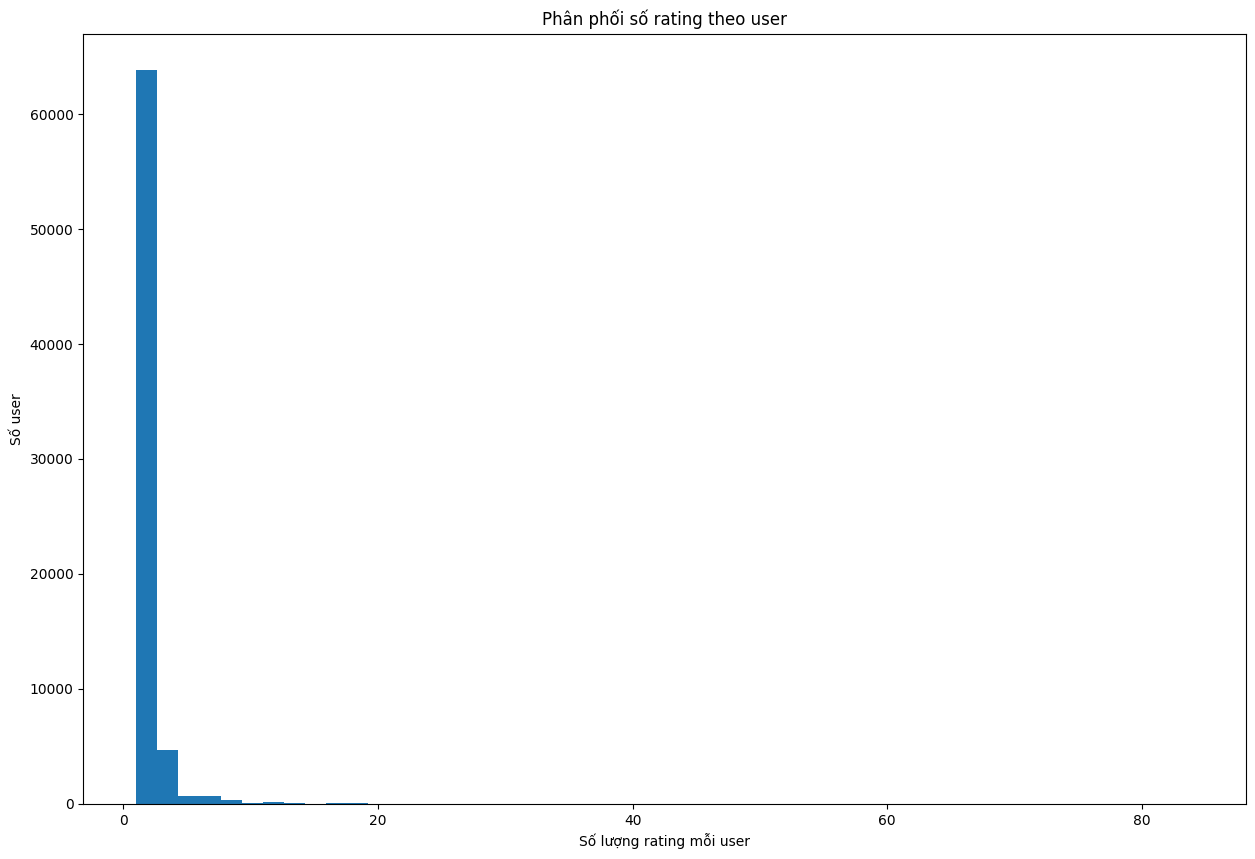

In [48]:
import matplotlib.pyplot as plt

customer_ratings = (
    ratings_with_name.groupby('customer_id')['rating']
    .count()
)

plt.hist(customer_ratings, bins=50)
plt.xlabel("S·ªë l∆∞·ª£ng rating m·ªói user")
plt.ylabel("S·ªë user")
plt.title("Ph√¢n ph·ªëi s·ªë rating theo user")
plt.show()


üìä PH√ÇN T√çCH PH√ÇN PH·ªêI S·ªê RATING C·ª¶A USERS
üìà T·ªïng s·ªë users: 70,690
üìà T·ªïng s·ªë ratings: 107,524
üìà Trung b√¨nh ratings/user: 1.52
üìà Median ratings/user: 1.00
üìà Std ratings/user: 1.76

üìä TH·ªêNG K√ä M√î T·∫¢:
count    70690.000000
mean         1.521064
std          1.764002
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         84.000000
Name: total_ratings, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_11844\2290564851.py:96: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PC\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


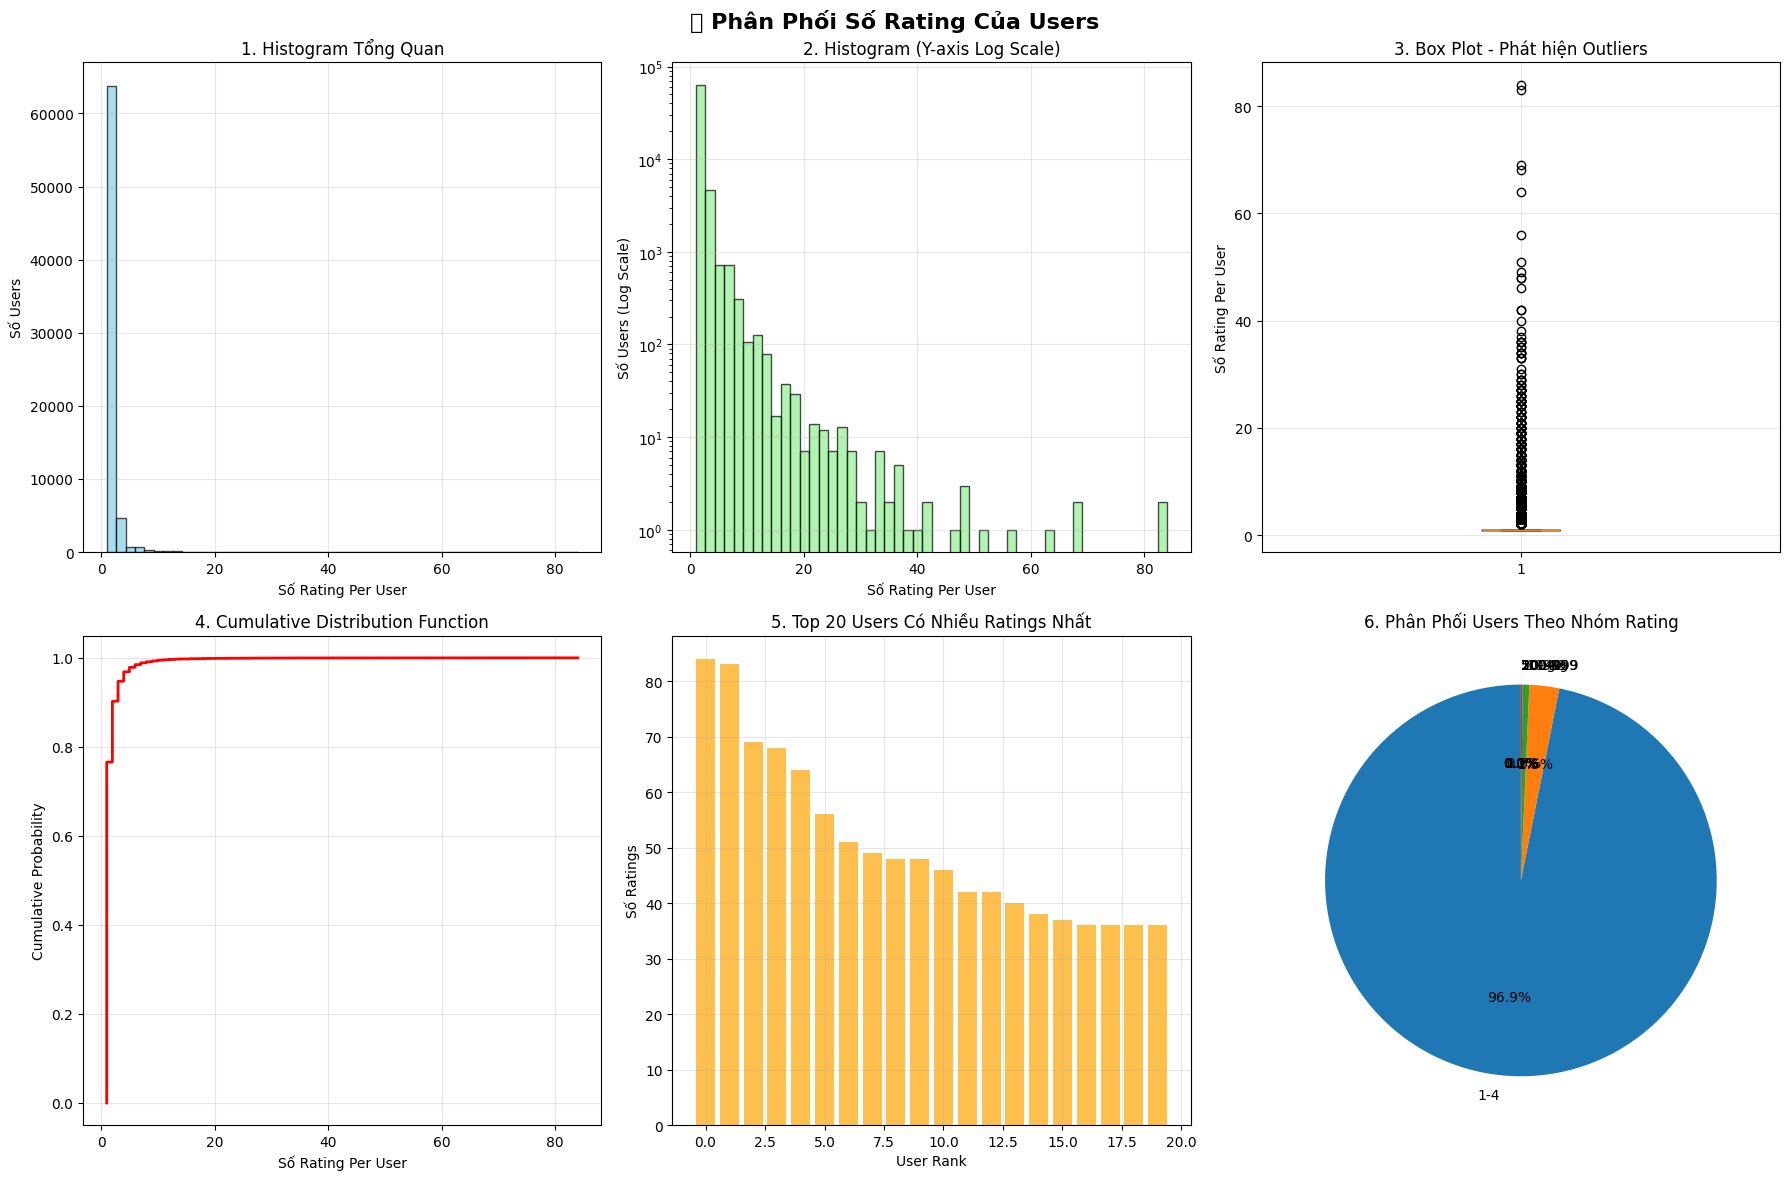


üìä PH√ÇN PH·ªêI USERS THEO NH√ìM S·ªê RATING:
--------------------------------------------------
üë• 1-4      ratings: 68,468 users ( 96.9%)
üë• 5-9      ratings:  1,735 users (  2.5%)
üë• 10-19    ratings:    395 users (  0.6%)
üë• 20-49    ratings:     85 users (  0.1%)
üë• 50-99    ratings:      7 users (  0.0%)
üë• 100-199  ratings:      0 users (  0.0%)
üë• 200-499  ratings:      0 users (  0.0%)
üë• 500+     ratings:      0 users (  0.0%)


In [49]:
# Ph√¢n t√≠ch chi ti·∫øt ph√¢n ph·ªëi s·ªë rating c·ªßa m·ªói user
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)

# ƒê·∫£m b·∫£o c√≥ d·ªØ li·ªáu ratings_with_name
if 'ratings_with_name' not in globals():
    print("Loading data...")
    books = pd.read_csv('prepared_data_book.csv')
    comments = pd.read_csv('comments_cleaned_20250903_233541.csv')
    if 'avg_rating' in books.columns:
        books = books.drop(columns=['avg_rating'])
    
    ratings_with_name = (
        comments.drop(columns=['title'])
                .merge(books, on='product_id')
                .rename(columns={'title': 'book_title'})
    )
    if 'Unnamed: 0' in ratings_with_name.columns:
        ratings_with_name = ratings_with_name.drop(columns=['Unnamed: 0'])

# T√≠nh s·ªë rating cho m·ªói user
user_rating_counts = (
    ratings_with_name.groupby('customer_id')['rating']
    .count()
    .reset_index(name='total_ratings')
    .sort_values('total_ratings', ascending=False)
)

print("üìä PH√ÇN T√çCH PH√ÇN PH·ªêI S·ªê RATING C·ª¶A USERS")
print("="*60)
print(f"üìà T·ªïng s·ªë users: {len(user_rating_counts):,}")
print(f"üìà T·ªïng s·ªë ratings: {user_rating_counts['total_ratings'].sum():,}")
print(f"üìà Trung b√¨nh ratings/user: {user_rating_counts['total_ratings'].mean():.2f}")
print(f"üìà Median ratings/user: {user_rating_counts['total_ratings'].median():.2f}")
print(f"üìà Std ratings/user: {user_rating_counts['total_ratings'].std():.2f}")

# Th·ªëng k√™ chi ti·∫øt
print(f"\nüìä TH·ªêNG K√ä M√î T·∫¢:")
print(user_rating_counts['total_ratings'].describe())

# T·∫°o subplot v·ªõi nhi·ªÅu bi·ªÉu ƒë·ªì
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('üìä Ph√¢n Ph·ªëi S·ªë Rating C·ªßa Users', fontsize=16, fontweight='bold')

# 1. Histogram t·ªïng quan
axes[0, 0].hist(user_rating_counts['total_ratings'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('S·ªë Rating Per User')
axes[0, 0].set_ylabel('S·ªë Users')
axes[0, 0].set_title('1. Histogram T·ªïng Quan')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram v·ªõi log scale
axes[0, 1].hist(user_rating_counts['total_ratings'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_xlabel('S·ªë Rating Per User')
axes[0, 1].set_ylabel('S·ªë Users (Log Scale)')
axes[0, 1].set_title('2. Histogram (Y-axis Log Scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# 3. Box plot
box_plot = axes[0, 2].boxplot(user_rating_counts['total_ratings'])
axes[0, 2].set_ylabel('S·ªë Rating Per User')
axes[0, 2].set_title('3. Box Plot - Ph√°t hi·ªán Outliers')
axes[0, 2].grid(True, alpha=0.3)

# 4. CDF (Cumulative Distribution Function)
sorted_ratings = np.sort(user_rating_counts['total_ratings'])
y_cdf = np.arange(1, len(sorted_ratings) + 1) / len(sorted_ratings)
axes[1, 0].plot(sorted_ratings, y_cdf, linewidth=2, color='red')
axes[1, 0].set_xlabel('S·ªë Rating Per User')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].set_title('4. Cumulative Distribution Function')
axes[1, 0].grid(True, alpha=0.3)

# 5. Top users bar chart
top_20_users = user_rating_counts.head(20)
axes[1, 1].bar(range(len(top_20_users)), top_20_users['total_ratings'], color='orange', alpha=0.7)
axes[1, 1].set_xlabel('User Rank')
axes[1, 1].set_ylabel('S·ªë Ratings')
axes[1, 1].set_title('5. Top 20 Users C√≥ Nhi·ªÅu Ratings Nh·∫•t')
axes[1, 1].grid(True, alpha=0.3)

# 6. Ph√¢n ph·ªëi theo bins
bins = [1, 5, 10, 20, 50, 100, 200, 500, float('inf')]
labels = ['1-4', '5-9', '10-19', '20-49', '50-99', '100-199', '200-499', '500+']
user_rating_counts['rating_group'] = pd.cut(user_rating_counts['total_ratings'], 
                                          bins=bins, labels=labels, right=False)
group_counts = user_rating_counts['rating_group'].value_counts()

axes[1, 2].pie(group_counts.values, labels=group_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 2].set_title('6. Ph√¢n Ph·ªëi Users Theo Nh√≥m Rating')

plt.tight_layout()
plt.show()

# In th·ªëng k√™ theo nh√≥m
print(f"\nüìä PH√ÇN PH·ªêI USERS THEO NH√ìM S·ªê RATING:")
print("-" * 50)
for group, count in group_counts.items():
    percentage = (count / len(user_rating_counts)) * 100
    print(f"üë• {group:8} ratings: {count:6,} users ({percentage:5.1f}%)")

In [68]:
# Use the customer_ratings DataFrame from cell 24 which has 'num_ratings' column
customer_ratings_df = (
    ratings_with_name
    .groupby('customer_id')['rating']
    .count()
    .reset_index(name='num_ratings')
    .sort_values('num_ratings', ascending=False)
)

thresholds = [5, 10, 20, 30, 40, 50]
for t in thresholds:
    n_users = (customer_ratings_df['num_ratings'] >= t).sum()
    print(f"S·ªë user c√≥ >= {t} ratings: {n_users}")

S·ªë user c√≥ >= 5 ratings: 2222
S·ªë user c√≥ >= 10 ratings: 487
S·ªë user c√≥ >= 20 ratings: 92
S·ªë user c√≥ >= 30 ratings: 32
S·ªë user c√≥ >= 40 ratings: 14
S·ªë user c√≥ >= 50 ratings: 7


In [69]:
x = ratings_with_name.groupby('customer_id').count()['rating'] > 10
padhe_likhe_users = x[x].index

In [70]:
filtered_rating = ratings_with_name[ratings_with_name['customer_id'].isin(padhe_likhe_users)]

In [71]:
filtered_rating

product_id  comment_id  thank_count  customer_id  rating  \
20        74021317     8795196            0     18704745       3   
85        74021317    17107939            0     20396347       5   
105      184466860    18249913            0     24273069       4   
175      184466860    18351806            0     27029783       5   
185       73787185    11801395           18       357419       5   
...            ...         ...          ...          ...     ...   
107330   157579054    15226176            0     24319300       5   
107333   157579054    18288928            0     10418172       5   
107335   157579054    18226016            0     16326962       5   
107435    58971672     6886092            0     14052374       5   
107457    58971672    16639742            0     10025671       5   

                                                  content  \
20      - S√°ch c√≤n m·ªõi, tuy nhi√™n g√≥c c√≥ v·∫øt v√† keo d√°...   
85      M√¨nh bi·∫øt cu·ªën n√†y c≈©ng ƒë√£ l√¢u r·ªìi, nh∆∞ng b√¢y ...   
105     M√¨nh nghƒ© s·∫£n ph·∫©m n√†y ch∆∞a b√†n ƒë·∫øn n·ªôi dung, ...   
175     Tiki giao haÃÄng nhanh, ƒëoÃÅng goÃÅi c√¢Ãân th√¢Ã£n. ...   
185     Tiki giao h√†ng qu√° tuy·ªát! D·ªãch gi√£ th·∫ø n√†y v·∫´n...   
...                                                   ...   
107330               ƒê√¢y l√† s√°ch v·ªÅ tri·∫øt h·ªçc hay v√† s√¢u.   
107333                                                NaN   
107335                                                NaN   
107435  C√°ch ƒë√¢y v√†i nƒÉm, m√¨nh c√≥ mua cu·ªën n√†y t·∫°i nh√†...   
107457  s√°ch ƒë·∫πp, hay, gi√° c·∫£ ph·∫£i chƒÉng, shop ƒë√≥ng g√≥...   

                                               book_title  \
20                                   C√¢y Cam Ng·ªçt C·ªßa T√¥i   
85                                   C√¢y Cam Ng·ªçt C·ªßa T√¥i   
105                       H√†nh Tinh C·ªßa M·ªôt K·∫ª Nghƒ© Nhi·ªÅu   
175                       H√†nh Tinh C·ªßa M·ªôt K·∫ª Nghƒ© Nhi·ªÅu   
185                              Nh·ªØng T√π Nh√¢n C·ªßa ƒê·ªãa L√Ω   
...                                                   ...   
107330  C√°c V·∫•n ƒê·ªÅ C·ªßa Tri·∫øt H·ªçc (The Problems Of Phil...   
107333  C√°c V·∫•n ƒê·ªÅ C·ªßa Tri·∫øt H·ªçc (The Problems Of Phil...   
107335  C√°c V·∫•n ƒê·ªÅ C·ªßa Tri·∫øt H·ªçc (The Problems Of Phil...   
107435  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   
107457  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   

                          authors  original_price  current_price  quantity  \
20      Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
85      Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
105          Nguy·ªÖn ƒêo√†n Minh Th∆∞            3.63           2.53      7929   
175          Nguy·ªÖn ƒêo√†n Minh Th∆∞            3.63           2.53      7929   
185                  Tim Marshall            8.86           5.32     17896   
...                           ...             ...            ...       ...   
107330           Bertrand Russell            3.59           2.06       147   
107333           Bertrand Russell            3.59           2.06       147   
107335           Bertrand Russell            3.59           2.06       147   
107435              Jack Canfield            5.82           3.84       954   
107457              Jack Canfield            5.82           3.84       954   

                        category  n_review  pages  \
20                   Ti·ªÉu Thuy·∫øt     11481    244   
85                   Ti·ªÉu Thuy·∫øt     11481    244   
105                       Others       780    184   
175                       Others       780    184   
185                Lƒ©nh v·ª±c kh√°c      3623    430   
...                          ...       ...    ...   
107330                    Others        20    236   
107333                    Others        20    236   
107335                    Others        20    236   
107435  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp   

In [74]:
book_ratings = (
    filtered_rating
    .groupby('book_title')['rating']
    .count()
    .reset_index(name='num_ratings')
    .sort_values('num_ratings', ascending=False)
)

print(book_ratings.head(10))  # xem top 10 s√°ch c√≥ nhi·ªÅu rating nh·∫•t


                                            book_title  num_ratings
78                                 Black Jack - T·∫≠p 14           33
781                Ng∆∞·ªùi b√† t√†i gi·ªèi v√πng Saga ‚Äì T·∫≠p 9           25
520  Ikigami - The Ultimate Limit - Tuy·ªÉn T·∫≠p Nh·ªØng...           24
75                                 Black Jack - T·∫≠p 12           24
80                       Black Jack - T·∫≠p 15 (B√¨a M·ªÅm)           22
492                                  H√¨nh C·∫£nh M·∫•t Tr√≠           22
77                       Black Jack - T·∫≠p 13 (B√¨a M·ªÅm)           22
348             DragonBall - 7 vi√™n ng·ªçc r·ªìng ( 1-42 )           22
522                                   Ikigami - T·∫≠p 08           21
427                      G·ª≠i em, ng∆∞·ªùi b·∫•t t·ª≠ - T·∫≠p 13           21


In [75]:
y = filtered_rating.groupby('book_title').count()['rating']>=8
famous_books = y[y].index

In [76]:
final_ratings = filtered_rating[filtered_rating['book_title'].isin(famous_books)]

In [77]:
pt = final_ratings.pivot_table(index='book_title',columns='customer_id',values='rating')

In [78]:
pt.fillna(0,inplace=True)

In [79]:
pt

customer_id                                         1654      2415      \
book_title                                                               
"C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0                           0.0       0.0   
12 Quy Lu·∫≠t Cu·ªôc ƒê·ªùi: Th·∫ßn D∆∞·ª£c Cho Cu·ªôc S·ªëng H...       0.0       0.0   
21 B√†i H·ªçc Cho Th·∫ø K·ª∑ 21                                 0.0       0.0   
365 Ng√†y Thong Dong                                      0.0       0.0   
451 ƒê·ªô F                                                 0.0       0.0   
...                                                      ...       ...   
ƒê·∫πp V√† Bu·ªìn                                              0.0       0.0   
ƒê·ªìi Th·ªè (T√°i B·∫£n 2019)                                   0.0       0.0   
ƒê·ª©a Con G√°i Hoang ƒê√†ng - Hai S·ªë Ph·∫≠n - Ph·∫ßn II           0.0       0.0   
·∫¢o D·∫° (T√°i B·∫£n)                                          0.0       0.0   
·ªû Qu√°n C√† Ph√™ C·ªßa Tu·ªïi Tr·∫ª L·∫°c L·ªëi (T√°i B·∫£n)             0.0       0.0   

customer_id                                         2426      4947      \
book_title                                                               
"C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0                           0.0       0.0   
12 Quy Lu·∫≠t Cu·ªôc ƒê·ªùi: Th·∫ßn D∆∞·ª£c Cho Cu·ªôc S·ªëng H...       0.0       0.0   
21 B√†i H·ªçc Cho Th·∫ø K·ª∑ 21                                 0.0       0.0   
365 Ng√†y Thong Dong                                      0.0       0.0   
451 ƒê·ªô F                                                 0.0       0.0   
...                                                      ...       ...   
ƒê·∫πp V√† Bu·ªìn                                              0.0       0.0   
ƒê·ªìi Th·ªè (T√°i B·∫£n 2019)                                   0.0       0.0   
ƒê·ª©a Con G√°i Hoang ƒê√†ng - Hai S·ªë Ph·∫≠n - Ph·∫ßn II           5.0       0.0   
·∫¢o D·∫° (T√°i B·∫£n)                                          0.0       0.0   
·ªû Qu√°n C√† Ph√™ C·ªßa Tu·ªïi Tr·∫ª L·∫°c L·ªëi (T√°i B·∫£n)             0.0       5.0   

customer_id                                         6623      8071      \
book_title                                                               
"C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0                           0.0       0.0   
12 Quy Lu·∫≠t Cu·ªôc ƒê·ªùi: Th·∫ßn D∆∞·ª£c Cho Cu·ªôc S·ªëng H...       0.0       0.0   
21 B√†i H·ªçc Cho Th·∫ø K·ª∑ 21                                 0.0       0.0   
365 Ng√†y Thong Dong                                      0.0       0.0   
451 ƒê·ªô F                                                 0.0       0.0   
...                                                      ...       ...   
ƒê·∫πp V√† Bu·ªìn                                              0.0       0.0   
ƒê·ªìi Th·ªè (T√°i B·∫£n 2019)                                   0.0       5.0   
ƒê·ª©a Con G√°i Hoang ƒê√†ng - Hai S·ªë Ph·∫≠n - Ph·∫ßn II           0.0       0.0   
·∫¢o D·∫° (T√°i B·∫£n)                                          0.0       0.0   
·ªû Qu√°n C√† Ph√™ C·ªßa Tu·ªïi Tr·∫ª L·∫°c L·ªëi (T√°i B·∫£n)             0.0       0.0   

customer_id                                         12751     26806     \
book_title                                                               
"C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0                           0.0       0.0   
12 Quy Lu·∫≠t Cu·ªôc ƒê·ªùi: Th·∫ßn D∆∞·ª£c Cho Cu·ªôc S·ªëng H...       0.0       0.0   
21 B√†i H·ªçc Cho Th·∫ø K·ª∑ 21                                 0.0       0.0   
365 Ng√†y Thong Dong                                      0.0       0.0   
451 ƒê·ªô F                                                 0.0       0.0   
...                                                      ...       ...   
ƒê·∫πp V√† Bu·ªìn                                              0.0       0.0   
ƒê·ªìi Th·ªè (T√°i B·∫£n 2019)                                   0.0       0.0   
ƒê·ª©a Con G√°i Hoang ƒê√†ng - Hai S·ªë Ph·∫≠n - Ph·∫ßn II           0.0

In [80]:
from sklearn.metrics.pairwise import cosine_similarity

In [81]:
similarity_scores = cosine_similarity(pt)

In [82]:
similarity_scores.shape

(257, 257)

In [83]:
def recommend(book_name):
    # Check if book exists in pivot table
    if book_name not in pt.index:
        print(f"Book '{book_name}' not found in the recommendation system.")
        print("Available books in the system:")
        print(pt.index.tolist()[:10])  # Show first 10 available books
        return []
    
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['title'] == pt.index[i[0]]]  # Use 'title' column from books
        if not temp_df.empty:
            item.extend(list(temp_df.drop_duplicates('title')['title'].values))
            item.extend(list(temp_df.drop_duplicates('title')['authors'].values))
            item.extend(list(temp_df.drop_duplicates('title')['cover_link'].values))
            
            data.append(item)
    
    return data

In [84]:
# Check if the book exists in pivot table
print("Checking if '365 Ng√†y Thong Dong' exists in pt.index:")
print('365 Ng√†y Thong Dong' in pt.index)

# Show some available books
print("\nFirst 5 books in the pivot table:")
print(pt.index[:5].tolist())

# Try recommending
recommend('C√¢y Cam Ng·ªçt C·ªßa T√¥i')

Checking if '365 Ng√†y Thong Dong' exists in pt.index:
True

First 5 books in the pivot table:
['"C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0', '12 Quy Lu·∫≠t Cu·ªôc ƒê·ªùi: Th·∫ßn D∆∞·ª£c Cho Cu·ªôc S·ªëng Hi·ªán ƒê·∫°i', '21 B√†i H·ªçc Cho Th·∫ø K·ª∑ 21', '365 Ng√†y Thong Dong', '451 ƒê·ªô F']
Book 'C√¢y Cam Ng·ªçt C·ªßa T√¥i' not found in the recommendation system.
Available books in the system:
['"C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0', '12 Quy Lu·∫≠t Cu·ªôc ƒê·ªùi: Th·∫ßn D∆∞·ª£c Cho Cu·ªôc S·ªëng Hi·ªán ƒê·∫°i', '21 B√†i H·ªçc Cho Th·∫ø K·ª∑ 21', '365 Ng√†y Thong Dong', '451 ƒê·ªô F', 'Anh Em Phi H√†nh Gia - T·∫≠p 32', 'Anh Em Phi H√†nh Gia - T·∫≠p 33', 'Anh em phi h√†nh gia - T·∫≠p 34', 'Anh em phi h√†nh gia - T·∫≠p 35', 'Birdmen - T·∫≠p 10']


[]

In [85]:
def hybrid_recommend(book_name):
    """
    Hybrid recommendation system:
    - Use collaborative filtering if book is in pivot table
    - Use content-based (same category) if not in pivot table
    """
    
    # Case 1: Book exists in collaborative filtering system
    if book_name in pt.index:
        print(f"Using Collaborative Filtering for '{book_name}'")
        return recommend(book_name)
    
    # Case 2: Book not in pivot table - use content-based approach
    print(f"Book '{book_name}' not in collaborative system. Using content-based approach...")
    
    # Find the book in books dataset
    book_info = books[books['title'] == book_name]
    if book_info.empty:
        print(f"Book '{book_name}' not found in database.")
        return []
    
    # Get book details
    book_category = book_info.iloc[0].get('category', '')
    book_author = book_info.iloc[0]['authors']
    
    print(f"Looking for books in same category: {book_category}")
    
    # Find books in same category
    if book_category and book_category != '':
        same_category_books = books[books['category'] == book_category]
    else:
        print("No category info available. Using author instead.")
        same_category_books = books[books['authors'] == book_author]
    
    # Remove the input book itself
    same_category_books = same_category_books[same_category_books['title'] != book_name]
    
    # Get top 4 books in same category (if available)
    recommendations = []
    for _, book in same_category_books.head(10).iterrows():
        recommendations.append([
            book['title'],
            book['authors'], 
            book['cover_link']
        ])
    
    if recommendations:
        print(f"Found {len(recommendations)} books in same category")
    else:
        print("No books in same category found. Using popular books instead.")
        # Fallback to popular books
        for _, book in popular_df.head(10).iterrows():
            recommendations.append([
                book['book_title'],
                book['authors'],
                book['cover_link']
            ])
    
    return recommendations

In [86]:
# Ki·ªÉm tra xem c√≥ c·ªôt category kh√¥ng
print("Columns in books dataset:", books.columns.tolist())
print("\nSample categories:")
if 'category' in books.columns:
    print(books['category'].value_counts().head(10))
    print(f"\nTotal unique categories: {books['category'].nunique()}")
else:
    print("No 'category' column found in books dataset")

print("\n" + "="*60)

# Test v·ªõi s√°ch c√≥ trong pivot table
print("=== Test 1: S√°ch c√≥ trong Collaborative Filtering ===")
available_book = pt.index[0]  # L·∫•y s√°ch ƒë·∫ßu ti√™n trong pivot table
print(f"Testing with: {available_book}")
result1 = hybrid_recommend(available_book)

print("\n=== Test 2: S√°ch KH√îNG c√≥ trong Collaborative Filtering ===") 
# Test v·ªõi s√°ch kh√¥ng c√≥ trong pivot table
unavailable_book = "C√¢y Cam Ng·ªçt C·ªßa T√¥i"
print(f"Testing with: {unavailable_book}")
result2 = hybrid_recommend(unavailable_book)

Columns in books dataset: ['Unnamed: 0', 'product_id', 'title', 'authors', 'original_price', 'current_price', 'quantity', 'category', 'n_review', 'pages', 'manufacturer', 'cover_link', 'discount']

Sample categories:
category
Others                             766
Ti·ªÉu Thuy·∫øt                        133
Truy·ªán ng·∫Øn - T·∫£n vƒÉn - T·∫°p VƒÉn    108
S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp            58
S√°ch k·ªπ nƒÉng l√†m vi·ªác               55
B√†i h·ªçc kinh doanh                  53
Truy·ªán trinh th√°m                   52
S√°ch H·ªçc Ti·∫øng Anh                  41
S√°ch t√†i ch√≠nh, ti·ªÅn t·ªá             40
S√°ch Marketing - B√°n h√†ng           40
Name: count, dtype: int64

Total unique categories: 30

=== Test 1: S√°ch c√≥ trong Collaborative Filtering ===
Testing with: "C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0
Using Collaborative Filtering for '"C·∫≠u" Ma Nh√† X√≠ Hanako - T·∫≠p 0'

=== Test 2: S√°ch KH√îNG c√≥ trong Collaborative Filtering ===
Testing with: C√¢y Cam Ng·ªçt C·

In [87]:
hybrid_recommend("C√¢y Cam Ng·ªçt C·ªßa T√¥i")

Book 'C√¢y Cam Ng·ªçt C·ªßa T√¥i' not in collaborative system. Using content-based approach...
Looking for books in same category: Ti·ªÉu Thuy·∫øt
Found 10 books in same category


[['M·ªôt Tho√°ng Ta R·ª±c R·ª° ·ªû Nh√¢n Gian',
  'Unknown',
  'https://salt.tikicdn.com/ts/product/2f/b5/4e/a8208e9019c8510e8a8eebe06f50299c.jpg'],
 ['Chi·∫øn Binh C·∫ßu V·ªìng (T√°i B·∫£n 2020)',
  'Andrea Hirata',
  'https://salt.tikicdn.com/ts/product/a1/ef/4f/0b39e40dca3827604c8bc4e867cc9423.jpg'],
 ['C√∫ SƒÉn ƒê√™m',
  'Samuel Bjork',
  'https://salt.tikicdn.com/ts/product/45/6c/b1/1d809c7be82ee19ca6b7ddcb18a494bc.jpg'],
 ['D√°m B·ªã Gh√©t',
  'Koga Fumitake',
  'https://salt.tikicdn.com/ts/product/74/11/ff/6304c47fec56e6f0b2110be65af0c7c2.jpg'],
 ['R·ª´ng Nauy (T√°i B·∫£n)',
  'Haruki Murakami',
  'https://salt.tikicdn.com/ts/product/c9/e4/18/a9cfc425fa590c453f20307229804bb3.jpg'],
 ['B·ªë Con C√° Gai (T√°i B·∫£n 2019)',
  'Cho Chang - In',
  'https://salt.tikicdn.com/ts/product/85/b4/a3/dc8b8311f434cc946563963bc8e30071.jpg'],
 ['Hi·ªáu S√°ch Nh·ªè ·ªû Paris',
  'Nina George',
  'https://salt.tikicdn.com/ts/product/7c/0d/6c/8fcbd6abc1ac716d07b3593f9b97f53b.jpg'],
 ['B·∫Øt Tr·∫ª 

## Machine Learning User-Based Recommender System (Matrix Factorization)

In [19]:
# C√†i ƒë·∫∑t th∆∞ vi·ªán c·∫ßn thi·∫øt cho Matrix Factorization
!pip install scikit-surprise

You should consider upgrading via the 'C:\Users\PC\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [88]:
from surprise import Dataset, Reader, SVD, NMF
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
import pandas as pd

# Chu·∫©n b·ªã d·ªØ li·ªáu cho Surprise library
print("Preparing data for Matrix Factorization...")
print(f"Original ratings shape: {ratings_with_name.shape}")

# T·∫°o dataset nh·ªè h∆°n ƒë·ªÉ train nhanh (c√≥ th·ªÉ ƒëi·ªÅu ch·ªânh)
ml_data = ratings_with_name[['customer_id', 'book_title', 'rating']].copy()

# L·ªçc d·ªØ li·ªáu: ch·ªâ l·∫•y user v√† book c√≥ √≠t nh·∫•t 5 ratings
user_counts = ml_data.groupby('customer_id').size()
user_counts
book_counts = ml_data.groupby('book_title').size()
book_counts
active_users = user_counts[user_counts >= 2].index
popular_books = book_counts[book_counts >= 2].index

ml_data_filtered = ml_data[
    (ml_data['customer_id'].isin(active_users)) & 
    (ml_data['book_title'].isin(popular_books))
]

print(f"Filtered data shape: {ml_data_filtered.shape}")
print(f"Unique users: {ml_data_filtered['customer_id'].nunique()}")
print(f"Unique books: {ml_data_filtered['book_title'].nunique()}")
print(f"Sparsity: {1 - len(ml_data_filtered) / (ml_data_filtered['customer_id'].nunique() * ml_data_filtered['book_title'].nunique()):.4f}")

ml_data_filtered.head()

Preparing data for Matrix Factorization...
Original ratings shape: (107524, 17)
Filtered data shape: (53370, 3)
Unique users: 16559
Unique books: 1696
Sparsity: 0.9981


customer_id            book_title  rating
0     22051463  C√¢y Cam Ng·ªçt C·ªßa T√¥i       5
1     27791831  C√¢y Cam Ng·ªçt C·ªßa T√¥i       5
2     17748750  C√¢y Cam Ng·ªçt C·ªßa T√¥i       5
5     24792909  C√¢y Cam Ng·ªçt C·ªßa T√¥i       3
6     10149686  C√¢y Cam Ng·ªçt C·ªßa T√¥i       5

In [81]:
active_users

Index([     247,     1176,     1196,     1654,     2415,     2426,     2970,
           3720,     4947,     5666,
       ...
       28319258, 28324771, 28340837, 28360163, 28386880, 28416332, 28443926,
       28448421, 28456214, 28535730],
      dtype='int64', name='customer_id', length=2222)

In [89]:
# T·∫°o Surprise Dataset
reader = Reader(rating_scale=(1, 5))  # Gi·∫£ s·ª≠ rating t·ª´ 1-5
surprise_data = Dataset.load_from_df(ml_data_filtered[['customer_id', 'book_title', 'rating']], reader)

# Chia train/test
trainset, testset = train_test_split(surprise_data, test_size=0.2, random_state=42)

print(f"Trainset size: {trainset.n_ratings}")
print(f"Testset size: {len(testset)}")

# Train SVD model (Matrix Factorization)
print("\\nTraining SVD (Singular Value Decomposition) model...")
svd_model = SVD(
    n_factors=10,        # S·ªë latent factors
    n_epochs=20,         # S·ªë epochs
    lr_all=0.005,        # Learning rate
    reg_all=0.02,        # Regularization
    random_state=42
)

svd_model.fit(trainset)
print("SVD model trained successfully!")

Trainset size: 42696
Testset size: 10674
\nTraining SVD (Singular Value Decomposition) model...
SVD model trained successfully!
SVD model trained successfully!


In [90]:
# ƒê√°nh gi√° model
predictions = svd_model.test(testset)
rmse = accuracy.rmse(predictions, verbose=False)
mae = accuracy.mae(predictions, verbose=False)

print(f"SVD Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Cross-validation ƒë·ªÉ ƒë√°nh gi√° t·ªïng qu√°t h∆°n
print("\\nPerforming 5-fold cross-validation...")
cv_results = cross_validate(svd_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print(f"\\nCross-validation Results:")
print(f"Mean RMSE: {cv_results['test_rmse'].mean():.4f} (+/- {cv_results['test_rmse'].std() * 2:.4f})")
print(f"Mean MAE: {cv_results['test_mae'].mean():.4f} (+/- {cv_results['test_mae'].std() * 2:.4f})")

SVD Model Performance:
RMSE: 0.7166
MAE: 0.4088
\nPerforming 5-fold cross-validation...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6865  0.7214  0.6922  0.7114  0.7217  0.7066  0.0147  
MAE (testset)     0.4007  0.4140  0.4016  0.4092  0.4146  0.4080  0.0059  
Fit time          0.40    0.35    0.35    0.38    0.34    0.36    0.02    
Test time         0.19    0.06    0.06    0.16    0.06    0.10    0.06    
\nCross-validation Results:
Mean RMSE: 0.7066 (+/- 0.0294)
Mean MAE: 0.4080 (+/- 0.0118)
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6865  0.7214  0.6922  0.7114  0.7217  0.7066  0.0147  
MAE (testset)     0.4007  0.4140  0.4016  0.4092  0.4146  0.4080  0.0059  
Fit time          0.40    0.35    0.35    0.38    0.34    0.36    0.02    
Test time         0.19    0.06    0.06  

In [91]:
def ml_recommend_for_user(user_id, n_recommendations=5):
    """
    G·ª£i √Ω s√°ch cho user d·ª±a tr√™n Matrix Factorization (SVD)
    """
    # L·∫•y t·∫•t c·∫£ s√°ch trong h·ªá th·ªëng
    all_books = ml_data_filtered['book_title'].unique()
    
    # L·∫•y s√°ch m√† user ƒë√£ ƒë√°nh gi√°
    user_rated_books = ml_data_filtered[ml_data_filtered['customer_id'] == user_id]['book_title'].unique()
    
    # T√¨m s√°ch ch∆∞a ƒë∆∞·ª£c ƒë√°nh gi√°
    unrated_books = [book for book in all_books if book not in user_rated_books]
    
    # D·ª± ƒëo√°n rating cho c√°c s√°ch ch∆∞a ƒë√°nh gi√°
    predictions = []
    for book in unrated_books:
        pred = svd_model.predict(user_id, book)
        predictions.append((book, pred.est))
    
    # S·∫Øp x·∫øp theo predicted rating gi·∫£m d·∫ßn
    predictions.sort(key=lambda x: x[1], reverse=True)
    
    # L·∫•y top N recommendations
    top_recommendations = predictions[:n_recommendations]
    
    # Format k·∫øt qu·∫£
    recommendations = []
    for book_title, predicted_rating in top_recommendations:
        book_info = books[books['title'] == book_title]
        if not book_info.empty:
            book_info = book_info.iloc[0]
            recommendations.append({
                'title': book_title,
                'author': book_info['authors'],
                'predicted_rating': round(predicted_rating, 2),
                'cover_link': book_info['cover_link']
            })
    
    return recommendations

def ml_recommend_similar_users(user_id, n_recommendations=5):
    """
    T√¨m user t∆∞∆°ng t·ª± v√† g·ª£i √Ω s√°ch d·ª±a tr√™n s·ªü th√≠ch c·ªßa h·ªç
    """
    # L·∫•y t·∫•t c·∫£ user kh√°c
    all_users = ml_data_filtered['customer_id'].unique()
    other_users = [u for u in all_users if u != user_id]
    
    # T√≠nh similarity v·ªõi c√°c user kh√°c d·ª±a tr√™n latent factors
    target_user_factors = svd_model.pu[trainset.to_inner_uid(user_id)]
    
    user_similarities = []
    for other_user in other_users:
        try:
            other_user_factors = svd_model.pu[trainset.to_inner_uid(other_user)]
            # Cosine similarity
            similarity = np.dot(target_user_factors, other_user_factors) / (
                np.linalg.norm(target_user_factors) * np.linalg.norm(other_user_factors)
            )
            user_similarities.append((other_user, similarity))
        except:
            continue
    
    # S·∫Øp x·∫øp theo similarity
    user_similarities.sort(key=lambda x: x[1], reverse=True)
    
    # L·∫•y top 10 user t∆∞∆°ng t·ª± nh·∫•t
    similar_users = [u[0] for u in user_similarities[:10]]
    
    # L·∫•y s√°ch ƒë∆∞·ª£c ƒë√°nh gi√° cao b·ªüi similar users
    target_user_books = set(ml_data_filtered[ml_data_filtered['customer_id'] == user_id]['book_title'])
    
    book_scores = {}
    for sim_user in similar_users:
        sim_user_books = ml_data_filtered[
            (ml_data_filtered['customer_id'] == sim_user) & 
            (ml_data_filtered['rating'] >= 4)  # Ch·ªâ l·∫•y rating cao
        ]
        
        for _, row in sim_user_books.iterrows():
            if row['book_title'] not in target_user_books:
                if row['book_title'] in book_scores:
                    book_scores[row['book_title']] += row['rating']
                else:
                    book_scores[row['book_title']] = row['rating']
    
    # S·∫Øp x·∫øp v√† l·∫•y top recommendations
    recommended_books = sorted(book_scores.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]
    
    # Format k·∫øt qu·∫£
    recommendations = []
    for book_title, score in recommended_books:
        book_info = books[books['title'] == book_title]
        if not book_info.empty:
            book_info = book_info.iloc[0]
            recommendations.append({
                'title': book_title,
                'author': book_info['authors'],
                'score': round(score, 2),
                'cover_link': book_info['cover_link']
            })
    
    return recommendations

In [92]:
# Test ML-based recommendations
print("=== Testing ML-based Recommendations ===")

# L·∫•y m·ªôt user c√≥ nhi·ªÅu ratings ƒë·ªÉ test
sample_user = ml_data_filtered.groupby('customer_id').size().sort_values(ascending=False).index[0]
print(f"Testing with user: {sample_user}")

# Xem l·ªãch s·ª≠ ƒë√°nh gi√° c·ªßa user
user_history = ml_data_filtered[ml_data_filtered['customer_id'] == sample_user].sort_values('rating', ascending=False)
print(f"\\nUser's rating history (top 5):")
print(user_history[['book_title', 'rating']].head())

print(f"\\n--- Method 1: Matrix Factorization Predictions ---")
svd_recommendations = ml_recommend_for_user(sample_user, n_recommendations=5)
for i, rec in enumerate(svd_recommendations, 1):
    print(f"{i}. {rec['title']} - {rec['author']} (Predicted: {rec['predicted_rating']})")

print(f"\\n--- Method 2: Similar Users Approach ---")
similar_user_recommendations = ml_recommend_similar_users(sample_user, n_recommendations=5)
for i, rec in enumerate(similar_user_recommendations, 1):
    print(f"{i}. {rec['title']} - {rec['author']} (Score: {rec['score']})")

=== Testing ML-based Recommendations ===
Testing with user: 12088578
\nUser's rating history (top 5):
                                              book_title  rating
615                                     Thao T√∫ng T√¢m L√Ω       5
58659      S√°ch - S·ª©c M·∫°nh C·ªßa S·ª± Tr·∫ßm L·∫Øng - First News       5
70384  M√≥n Qu√† C·ªßa Linh H·ªìn - \nS·ª©c M·∫°nh Ch·ªØa L√†nh C·ªß...       5
69848          NG√ÄI C√ìC ƒêI G·∫∂P B√ÅC Sƒ® T√ÇM L√ù ( B√åA C·ª®NG)       5
67630         S√°ch ƒêen - B·ªô C√¥ng C·ª• C·ªßa Ph·ª• N·ªØ Th√†nh ƒê·∫°t       5
\n--- Method 1: Matrix Factorization Predictions ---
1. Y√™u Nh·ªØng ƒêi·ªÅu Kh√¥ng Ho√†n H·∫£o - Hae Min (Predicted: 5)
2. Quy·ªÅn L·ª±c C·ªßa ƒê·ªãa L√Ω - The Power Of Geography - Tim Marshall (Predicted: 5)
3. ƒê·∫°i D∆∞∆°ng ƒêen - Nh·ªØng C√¢u Chuy·ªán T·ª´ Th·∫ø Gi·ªõi C·ªßa Tr·∫ßm C·∫£m - ƒê·∫∑ng Ho√†ng Giang (Predicted: 5)
4. Nh·ªØng Ng∆∞·ªùi Kh·ªën Kh·ªï (Boxet 2 T·∫≠p) - Victor Hugo (Predicted: 5)
5. Ti·∫øng N√∫i - Kawabata Yasunari (P

In [93]:
# Ph√¢n t√≠ch chi ti·∫øt user similarity
def analyze_user_similarity(target_user_id, top_n=10):
    """
    Ph√¢n t√≠ch xem user hi·ªán t·∫°i t∆∞∆°ng ƒë·ªìng v·ªõi user n√†o
    """
    target_user_id = 162872 
    print(f"üîç PH√ÇN T√çCH T∆Ø∆†NG ƒê·ªíNG CHO USER {target_user_id}")
    print("="*70)
    
    # Xem s·ªü th√≠ch c·ªßa target user
    target_history = ml_data_filtered[ml_data_filtered['customer_id'] == target_user_id]
    print(f"üìö S·ªü th√≠ch c·ªßa User {target_user_id}:")
    print(f"   - T·ªïng s·ªë s√°ch ƒë√£ ƒë√°nh gi√°: {len(target_history)}")
    print(f"   - ƒêi·ªÉm trung b√¨nh: {target_history['rating'].mean():.2f}")
    print(f"   - S√°ch y√™u th√≠ch nh·∫•t (rating 5):")
    
    favorite_books = target_history[target_history['rating'] == 5]['book_title'].tolist()
    for i, book in enumerate(favorite_books[:5], 1):
        print(f"      {i}. {book}")
    
    # T√≠nh similarity v·ªõi t·∫•t c·∫£ user kh√°c
    all_users = ml_data_filtered['customer_id'].unique()
    other_users = [u for u in all_users if u != target_user_id]
    
    target_user_factors = svd_model.pu[trainset.to_inner_uid(target_user_id)]
    
    user_similarities = []
    for other_user in other_users:
        try:
            other_user_factors = svd_model.pu[trainset.to_inner_uid(other_user)]
            # Cosine similarity
            similarity = np.dot(target_user_factors, other_user_factors) / (
                np.linalg.norm(target_user_factors) * np.linalg.norm(other_user_factors)
            )
            user_similarities.append((other_user, similarity))
        except:
            continue
    
    # S·∫Øp x·∫øp theo similarity gi·∫£m d·∫ßn
    user_similarities.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\nüë• TOP {top_n} USER T∆Ø∆†NG ƒê·ªíNG NH·∫§T:")
    print("-"*70)
    
    for i, (similar_user, similarity_score) in enumerate(user_similarities[:top_n], 1):
        # L·∫•y th√¥ng tin v·ªÅ similar user
        similar_history = ml_data_filtered[ml_data_filtered['customer_id'] == similar_user]
        similar_avg = similar_history['rating'].mean()
        
        # T√¨m s√°ch chung gi·ªØa 2 users
        target_books = set(target_history['book_title'])
        similar_books = set(similar_history['book_title'])
        common_books = target_books.intersection(similar_books)
        
        print(f"{i:2d}. User {similar_user} (T∆∞∆°ng ƒë·ªìng: {similarity_score:.4f})")
        print(f"    üìä S·ªë s√°ch ƒë√°nh gi√°: {len(similar_history)}")
        print(f"    ‚≠ê ƒêi·ªÉm TB: {similar_avg:.2f}")
        print(f"    ü§ù S√°ch chung: {len(common_books)} cu·ªën")
        
        # Hi·ªÉn th·ªã m·ªôt s·ªë s√°ch chung n·∫øu c√≥
        if common_books:
            common_sample = list(common_books)[:3]
            for book in common_sample:
                target_rating = target_history[target_history['book_title'] == book]['rating'].iloc[0]
                similar_rating = similar_history[similar_history['book_title'] == book]['rating'].iloc[0]
                print(f"       üìñ {book[:50]}{'...' if len(book) > 50 else ''}")
                print(f"          You: {target_rating}‚≠ê | User {similar_user}: {similar_rating}‚≠ê")
        
        print()
    
    # Ph√¢n t√≠ch nh√≥m users t∆∞∆°ng ƒë·ªìng
    top_similar_users = [u[0] for u in user_similarities[:5]]
    
    print("üéØ PH√ÇN T√çCH NH√ìM USERS T∆Ø∆†NG ƒê·ªíNG:")
    print("-"*50)
    
    # T√¨m s√°ch ƒë∆∞·ª£c nh√≥m n√†y y√™u th√≠ch
    group_favorites = {}
    for sim_user in top_similar_users:
        sim_books = ml_data_filtered[
            (ml_data_filtered['customer_id'] == sim_user) & 
            (ml_data_filtered['rating'] >= 4)
        ]
        
        for _, row in sim_books.iterrows():
            book = row['book_title']
            if book not in target_history['book_title'].values:  # Ch∆∞a ƒë·ªçc
                if book in group_favorites:
                    group_favorites[book] += row['rating']
                else:
                    group_favorites[book] = row['rating']
    
    # Top recommendations t·ª´ nh√≥m t∆∞∆°ng ƒë·ªìng
    group_recommendations = sorted(group_favorites.items(), key=lambda x: x[1], reverse=True)[:5]
    
    print("üìö S√ÅCH ƒê∆Ø·ª¢C NH√ìM T∆Ø∆†NG ƒê·ªíNG Y√äU TH√çCH (b·∫°n ch∆∞a ƒë·ªçc):")
    for i, (book, total_score) in enumerate(group_recommendations, 1):
        print(f"{i}. {book} (T·ªïng ƒëi·ªÉm: {total_score})")
    
    return user_similarities[:top_n]

# Test v·ªõi user m·∫´u
sample_user = ml_data_filtered.groupby('customer_id').size().sort_values(ascending=False).index[0]
similarity_results = analyze_user_similarity(sample_user, top_n=8)

üîç PH√ÇN T√çCH T∆Ø∆†NG ƒê·ªíNG CHO USER 162872
üìö S·ªü th√≠ch c·ªßa User 162872:
   - T·ªïng s·ªë s√°ch ƒë√£ ƒë√°nh gi√°: 6
   - ƒêi·ªÉm trung b√¨nh: 4.83
   - S√°ch y√™u th√≠ch nh·∫•t (rating 5):
      1. Ng∆∞·ªùi con
      2. Bitna D∆∞·ªõi B·∫ßu Tr·ªùi Seoul
      3. L√≠nh Tr∆°n - Khoa H·ªçc L·∫° K·ª≥ V·ªÅ Lo√†i Ng∆∞·ªùi Trong Chi·∫øn Tranh
      4. S·ª± Tr·ªói D·∫°y V√† Suy T√†n C·ªßa ƒê·∫ø Ch·∫ø Th·ª© 3 (T√°i B·∫£n)
      5. Bu·ªìng T·∫Øm

üë• TOP 8 USER T∆Ø∆†NG ƒê·ªíNG NH·∫§T:
----------------------------------------------------------------------
 1. User 1827148 (T∆∞∆°ng ƒë·ªìng: 0.8929)
    üìä S·ªë s√°ch ƒë√°nh gi√°: 3
    ‚≠ê ƒêi·ªÉm TB: 5.00
    ü§ù S√°ch chung: 0 cu·ªën

 2. User 16478449 (T∆∞∆°ng ƒë·ªìng: 0.8918)
    üìä S·ªë s√°ch ƒë√°nh gi√°: 2
    ‚≠ê ƒêi·ªÉm TB: 5.00
    ü§ù S√°ch chung: 0 cu·ªën

 3. User 22925881 (T∆∞∆°ng ƒë·ªìng: 0.8862)
    üìä S·ªë s√°ch ƒë√°nh gi√°: 2
    ‚≠ê ƒêi·ªÉm TB: 5.00
    ü§ù S√°ch chung: 0 cu·ªën

 4. User 20453871 (T∆∞∆°ng ƒë·

In [94]:
import pickle
pickle.dump(popular_df,open('popular_new.pkl','wb'))

In [95]:
books.drop_duplicates('title')

Unnamed: 0  product_id  \
0              0    74021317   
1              2   184466860   
2              3    73787185   
3              4    52789367   
4              5   147920903   
...          ...         ...   
1762        1791   192949122   
1763        1792   157579054   
1764        1793    20704715   
1765        1794   131144753   
1766        1795    58971672   

                                                  title  \
0                                  C√¢y Cam Ng·ªçt C·ªßa T√¥i   
1                       H√†nh Tinh C·ªßa M·ªôt K·∫ª Nghƒ© Nhi·ªÅu   
2                              Nh·ªØng T√π Nh√¢n C·ªßa ƒê·ªãa L√Ω   
3                            Nh√† Gi·∫£ Kim (T√°i B·∫£n 2020)   
4                      M·ªôt Tho√°ng Ta R·ª±c R·ª° ·ªû Nh√¢n Gian   
...                                                 ...   
1762  7 Th√≥i Quen Hi·ªáu Qu·∫£ - The 7 Habits Of Highly ...   
1763  C√°c V·∫•n ƒê·ªÅ C·ªßa Tri·∫øt H·ªçc (The Problems Of Phil...   
1764  ƒê·ªÉ Con ƒê∆∞·ª£c Ch√≠ch - Hi·ªÉu H·∫øt V·ªÅ V·∫Øc Xin V√† Mi·ªÖ...   
1765                      Nh√† L√£nh ƒê·∫°o 360 ƒê·ªô (T√°i B·∫£n)   
1766  The Best of Chicken Soup - Tuy·ªÉn T·∫≠p Nh·ªØng C√¢u...   

                        authors  original_price  current_price  quantity  \
0     Jos√© Mauro de Vasconcelos            4.56           2.73     53075   
1          Nguy·ªÖn ƒêo√†n Minh Th∆∞            3.63           2.53      7929   
2                  Tim Marshall            8.86           5.32     17896   
3                  Paulo Coelho            3.33           2.00     24668   
4                       Unknown            5.70           3.42     10000   
...                         ...             ...            ...       ...   
1762            Stephen R Covey           10.55           8.07        76   
1763           Bertrand Russell            3.59           2.06       147   
1764                   Uy√™n B√πi            4.56           1.82       931   
1765            John C. Maxwell            7.55           4.54       378   
1766              Jack Canfield            5.82           3.84       954   

                      category  n_review  pages                  manufacturer  \
0                  Ti·ªÉu Thuy·∫øt     11481    244      Nh√† Xu·∫•t B·∫£n H·ªôi Nh√† VƒÉn   
1                       Others       780    184         Nh√† Xu·∫•t B·∫£n Th·∫ø Gi·ªõi   
2                Lƒ©nh v·ª±c kh√°c      3623    430      Nh√† Xu·∫•t B·∫£n H·ªôi Nh√† VƒÉn   
3           T√°c ph·∫©m kinh ƒëi·ªÉn      5131    228           Nh√† Xu·∫•t B·∫£n H√† N·ªôi   
4                  Ti·ªÉu Thuy·∫øt      1636    304      Nh√† Xu·∫•t B·∫£n H·ªôi Nh√† VƒÉn   
...                        ...       ...    ...                           ...   
1762                    Others         7    456  Nh√† Xu·∫•t B·∫£n T·ªïng h·ª£p TP.HCM   
1763                    Others        20    236  Nh√† Xu·∫•t B·∫£n Khoa H·ªçc X√£ H·ªôi   
1764           S√°ch L√†m Cha M·∫π        47    296                       Unknown   
1765   S√°ch qu·∫£n tr·ªã, l√£nh ƒë·∫°o        33    436         Nh√† Xu·∫•t B·∫£n Lao ƒê·ªông   
1766  S√°ch ngh·ªá thu·∫≠t s·ªëng ƒë·∫πp       176    256  Nh√† Xu·∫•t B·∫£n T·ªïng h·ª£p TP.HCM   

                                             cover_link  discount  
0     https://salt.tikicdn.com/ts/product/5e/18/24/2...      0.40  
1     https://salt.tikicdn.com/ts/product/d7/99/24/1...      0.30  
2     https://salt.tikicdn.com/ts/product/8d/96/9e/c...      0.40  
3     https://salt.tikicdn.com/ts/product/45/3b/fc/a...      0.40  
4     https://salt.tikicdn.com/ts/product/2f/b5/4e/a...      0.40  
...                                                 ...       ...  
1762  https://salt.tikicdn.com/ts/product/ba/c3/c0/1...      0.24  
1763  https://salt.tikicdn.com/ts/product/a5/52/7f/3...      0.42  
1764  https://salt.tikicdn.com/ts/product/05/15/e0/1...      0.60  
1765  https://salt.tikicdn.com/ts/product/fd/bd/40/8...      0.40  
1766  https://salt.tikicdn.com/media/catalog/product.

In [96]:
pickle.dump(pt,open('pt_new.pkl','wb'))
pickle.dump(books,open('books_new.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores_new.pkl','wb'))

In [97]:
# L∆∞u SVD model v√† d·ªØ li·ªáu ML ƒë·ªÉ s·ª≠ d·ª•ng l·∫°i
print("Saving ML models and data...")

# L∆∞u SVD model
import joblib
joblib.dump(svd_model, 'svd_model.pkl')

# L∆∞u c√°c d·ªØ li·ªáu c·∫ßn thi·∫øt cho ML recommendations
pickle.dump(ml_data_filtered, open('ml_data_filtered.pkl', 'wb'))
pickle.dump(trainset, open('trainset.pkl', 'wb'))

print("Saved files:")
print("- svd_model.pkl (SVD Matrix Factorization model)")
print("- ml_data_filtered.pkl (Filtered ML dataset)")  
print("- trainset.pkl (Training set for user/book ID mapping)")
print("- popular_new.pkl (Popular books)")
print("- pt_new.pkl (Pivot table for collaborative filtering)")
print("- books_new.pkl (Books dataset)")
print("- similarity_scores_new.pkl (Similarity matrix)")

print("\nAll models saved successfully! üéâ")

Saving ML models and data...
Saved files:
- svd_model.pkl (SVD Matrix Factorization model)
- ml_data_filtered.pkl (Filtered ML dataset)
- trainset.pkl (Training set for user/book ID mapping)
- popular_new.pkl (Popular books)
- pt_new.pkl (Pivot table for collaborative filtering)
- books_new.pkl (Books dataset)
- similarity_scores_new.pkl (Similarity matrix)

All models saved successfully! üéâ
Saved files:
- svd_model.pkl (SVD Matrix Factorization model)
- ml_data_filtered.pkl (Filtered ML dataset)
- trainset.pkl (Training set for user/book ID mapping)
- popular_new.pkl (Popular books)
- pt_new.pkl (Pivot table for collaborative filtering)
- books_new.pkl (Books dataset)
- similarity_scores_new.pkl (Similarity matrix)

All models saved successfully! üéâ


## Load Saved Models (For Future Use)

In [ ]:
# Code ƒë·ªÉ load l·∫°i models ƒë√£ l∆∞u (s·ª≠ d·ª•ng khi restart notebook)
def load_saved_models():
    """
    Load all saved models and data
    Ch·ªâ ch·∫°y function n√†y khi c·∫ßn load l·∫°i models m√† kh√¥ng mu·ªën train l·∫°i
    """
    global svd_model, ml_data_filtered, trainset, popular_df, pt, books, similarity_scores
    
    print("Loading saved models...")
    
    try:
        # Load SVD model
        import joblib
        svd_model = joblib.load('svd_model.pkl')
        print("‚úÖ SVD model loaded")
        
        # Load ML data
        ml_data_filtered = pickle.load(open('ml_data_filtered.pkl', 'rb'))
        print("‚úÖ ML filtered data loaded")
        
        # Load trainset
        trainset = pickle.load(open('trainset.pkl', 'rb'))
        print("‚úÖ Trainset loaded")
        
        # Load other models
        popular_df = pickle.load(open('popular_new.pkl', 'rb'))
        print("‚úÖ Popular books loaded")
        
        pt = pickle.load(open('pt_new.pkl', 'rb'))
        print("‚úÖ Pivot table loaded")
        
        books = pickle.load(open('books_new.pkl', 'rb'))
        print("‚úÖ Books data loaded")
        
        similarity_scores = pickle.load(open('similarity_scores_new.pkl', 'rb'))
        print("‚úÖ Similarity scores loaded")
        
        print("\nüéâ All models loaded successfully!")
        print(f"SVD model ready with {ml_data_filtered.shape[0]} ratings")
        print(f"Collaborative filtering ready with {pt.shape[0]} books")
        
    except FileNotFoundError as e:
        print(f"‚ùå Error: {e}")
        print("Please run the training cells first!")
    except Exception as e:
        print(f"‚ùå Unexpected error: {e}")

# Uncomment the line below to load models
# load_saved_models()

In [ ]:
# Th·ª≠ nghi·ªám v·ªõi c√°c threshold kh√°c nhau ƒë·ªÉ c√≥ dataset l·ªõn h∆°n
def experiment_different_thresholds():
    """
    Th·ª≠ c√°c threshold kh√°c nhau ƒë·ªÉ xem ·∫£nh h∆∞·ªüng ƒë·∫øn size v√† performance
    """
    print("üß™ EXPERIMENTING WITH DIFFERENT THRESHOLDS üß™")
    print("="*60)
    
    thresholds = [(3, 3), (4, 4), (5, 5), (6, 6), (10, 10)]
    
    for user_thresh, book_thresh in thresholds:
        # L·ªçc data
        ml_data = ratings_with_name[['customer_id', 'book_title', 'rating']].copy()
        
        user_counts = ml_data.groupby('customer_id').size()
        book_counts = ml_data.groupby('book_title').size()
        
        active_users = user_counts[user_counts >= user_thresh].index
        popular_books = book_counts[book_counts >= book_thresh].index
        
        filtered_data = ml_data[
            (ml_data['customer_id'].isin(active_users)) & 
            (ml_data['book_title'].isin(popular_books))
        ]
        
        sparsity = 1 - len(filtered_data) / (
            filtered_data['customer_id'].nunique() * 
            filtered_data['book_title'].nunique()
        )
        
        print(f"Threshold ‚â•{user_thresh}: {filtered_data.shape[0]:,} ratings, "
              f"{filtered_data['customer_id'].nunique():,} users, "
              f"{filtered_data['book_title'].nunique():,} books, "
              f"Sparsity: {sparsity:.3f}")
    
    print("\nüí° Hi·ªán t·∫°i ƒëang d√πng threshold ‚â•5 (c√¢n b·∫±ng t·ªët gi·ªØa size v√† quality)")
    print("üí° C√≥ th·ªÉ th·ª≠ ‚â•3 ƒë·ªÉ c√≥ dataset l·ªõn h∆°n (nh∆∞ng c√≥ th·ªÉ noisy h∆°n)")

# Uncomment ƒë·ªÉ ch·∫°y experiment
# experiment_different_thresholds()